<a href="https://colab.research.google.com/github/bukovskiy7777/Data-Analysis/blob/main/Test_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set();

# Загальний огляд

In [2]:
df = pd.read_csv("/content/test_task.csv")
df.head()

,user_id,transaction_id,reference_transaction_id,project,plan_id,transaction_type,status,decline_code,transaction_time,psp_name,payment_method_type,card_brand,card_type,card_level,country,amount_usd,fee_usd
0,u_0001f8a7ee92,t_5cd8aa890853,NaN,Nexora,p_3934,SALE,SUCCESS,NaN,2025-09-15 02:21:44.909000,Global Payments,card,VISA,CREDIT,CLASSIC,US,30.58,0.4234
1,u_0001f8a7ee92,t_a9d478f87372,t_5cd8aa890853,Nexora,p_3934,CAPTURE,SUCCESS,NaN,2025-09-19 20:22:12.437000,Global Payments,card,VISA,CREDIT,CLASSIC,US,0.00,1.1781
2,u_0001f8a7ee92,t_f43e08a529ec,NaN,Nexora,p_3934,SALE,DECLINED,4670.0,2025-09-23 20:20:26.408000,Fiserv,card,VISA,CREDIT,CLASSIC,US,0.00,0.6051
3,u_0001f8a7ee92,t_d1439d0cf4be,NaN,Nexora,p_3934,SALE,DECLINED,4670.0,2025-10-19 15:21:50.706000,Global Payments,card,VISA,CREDIT,CLASSIC,US,0.00,0.4222
4,u_0001f8a7ee92,t_1503c7d7d71a,NaN,Nexora,p_3934,SALE,DECLINED,4670.0,2025-10-20 10:33:51.398000,Global Payments,card,VISA,CREDIT,CLASSIC,US,0.00,0.4217


In [35]:
df.shape

(463521, 17)

### Аналіз пропущених значень

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463521 entries, 0 to 463520
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   user_id                   463239 non-null  object 
 1   transaction_id            463521 non-null  object 
 2   reference_transaction_id  116264 non-null  object 
 3   project                   463521 non-null  object 
 4   plan_id                   462588 non-null  object 
 5   transaction_type          463521 non-null  object 
 6   status                    463521 non-null  object 
 7   decline_code              139225 non-null  float64
 8   transaction_time          463521 non-null  object 
 9   psp_name                  463521 non-null  object 
 10  payment_method_type       459833 non-null  object 
 11  card_brand                453801 non-null  object 
 12  card_type                 434641 non-null  object 
 13  card_level                414152 non-null  o

Частина колонок мають пропущені значення, такі як user_id, plan_id, payment_method_type, country, card_brand, card_type, card_level

In [4]:
df.describe()

,decline_code,amount_usd,fee_usd
count,139225.000000,463521.000000,463521.00000
mean,5499.071819,20.436060,1.04847
std,2285.438001,31.552938,2.79007
min,31.000000,-145.120000,-2.86080
25%,4670.000000,0.000000,0.08570
50%,4670.000000,0.000000,0.42290
75%,7322.000000,45.880000,1.41100
max,9966.000000,145.120000,63.12250


### Аналіз категоріальних колонок

In [5]:
df.describe(include=["object"])

,user_id,transaction_id,reference_transaction_id,project,plan_id,transaction_type,status,transaction_time,psp_name,payment_method_type,card_brand,card_type,card_level,country
count,463239,463521,116264,463521,462588,463521,463521,463521,463521,459833,453801,434641,414152,455527
unique,114437,463521,111934,3,48,7,3,462940,7,4,10,3,49,122
top,u_297f52945bab,t_c0cf7c968a46,t_54ad68e488dd,Nexora,p_3934,SALE,SUCCESS,2025-10-30 17:00:00.000000,HSBC,apple_pay,VISA,DEBIT,CLASSIC,US
freq,37,1,11,359197,206464,347031,334150,5,349363,304386,278662,250437,210046,204741


Подивимось, які значення приймають основні категоріальні колонки:

In [6]:
df["project"].value_counts(dropna=False)

,count
project,
Nexora,359197
Flowvia,66054
Corely,38270


In [8]:
df["transaction_type"].value_counts(dropna=False)

,count
transaction_type,
SALE,347031
CAPTURE,97881
REFUND,9097
ALERT,5064
VOID,3111
CHARGEBACK,1239
DISPUTE,98


In [9]:
df["status"].value_counts(dropna=False)

,count
status,
SUCCESS,334150
DECLINED,129269
LOST,102


In [9]:
df["psp_name"].value_counts(dropna=False)

,count
psp_name,
HSBC,349363
Fiserv,93135
Global Payments,9409
JPMorgan,5130
FIS,3561
Vertex Ltd,2915
Fluxline Inc,8


In [10]:
df['payment_method_type'].value_counts(dropna=False)

,count
payment_method_type,
apple_pay,304386
card,100489
google_pay,52035
NaN,3688
paypal,2923


In [12]:
df['card_brand'].value_counts(dropna=False)

,count
card_brand,
VISA,278662
MASTERCARD,152569
AMEX,18337
NaN,9720
DISCOVER,4185
MAESTRO,37
ELOCARD,4
LOCAL CARD,2
MIR,2


In [11]:
df['card_type'].value_counts(dropna=False)

,count
card_type,
DEBIT,250437
CREDIT,184093
NaN,28880
PREPAID,111


# Аналіз аномалій в даних

### Які transaction_type є при amount_usd < 0 та fee_usd < 0

In [12]:
df[df["amount_usd"] < 0]["transaction_type"].value_counts()

,count
transaction_type,
REFUND,8721
ALERT,4710
VOID,2990
CHARGEBACK,1200
DISPUTE,98


In [15]:
df[df["fee_usd"] < 0]["transaction_type"].value_counts()

,count
transaction_type,
DISPUTE,35
CHARGEBACK,2


### Які status є при decline_code <> NaN

In [18]:
df[df["decline_code"].notna()]['status'].value_counts(dropna=False)

,count
status,
DECLINED,128811
SUCCESS,10414


### Які transaction_type є при decline_code <> NaN and status == "SUCCESS"

In [13]:
df[(df["decline_code"].notna()) & (df["status"]=="SUCCESS")]['transaction_type'].value_counts(dropna=False)

,count
transaction_type,
SALE,4292
ALERT,3204
CAPTURE,2035
CHARGEBACK,883


### Які amount_usd є при різних transaction_type

In [14]:
def categorize_amount(val):
    if val > 0: return 'Positive (> 0)'
    elif val < 0: return 'Negative (< 0)'
    else: return 'Zero (= 0)'

df_copy = df
df_copy['amount_category'] = df_copy['amount_usd'].apply(categorize_amount)
analysis = pd.crosstab(df_copy['transaction_type'], df_copy['amount_category'], margins=True, margins_name='Total')
display(analysis)

amount_category,Negative (< 0),Positive (> 0),Zero (= 0),Total
transaction_type,,,,
ALERT,4710,0,354,5064
CAPTURE,0,0,97881,97881
CHARGEBACK,1200,0,39,1239
DISPUTE,98,0,0,98
REFUND,8721,0,376,9097
SALE,0,218700,128331,347031
VOID,2990,0,121,3111
Total,17719,218700,227102,463521


### Перетворення `transaction_time` на об'єкти datetime

In [15]:
df['transaction_time'] = pd.to_datetime(df['transaction_time'])

df['transaction_hour'] = df['transaction_time'].dt.hour
df['transaction_dayofweek'] = df['transaction_time'].dt.dayofweek # Monday=0, Sunday=6
display(df[['transaction_time', 'transaction_hour', 'transaction_dayofweek']].head())

,transaction_time,transaction_hour,transaction_dayofweek
0,2025-09-15 02:21:44.909,2,0
1,2025-09-19 20:22:12.437,20,4
2,2025-09-23 20:20:26.408,20,1
3,2025-10-19 15:21:50.706,15,6
4,2025-10-20 10:33:51.398,10,0


### Розподіл `amount_usd`

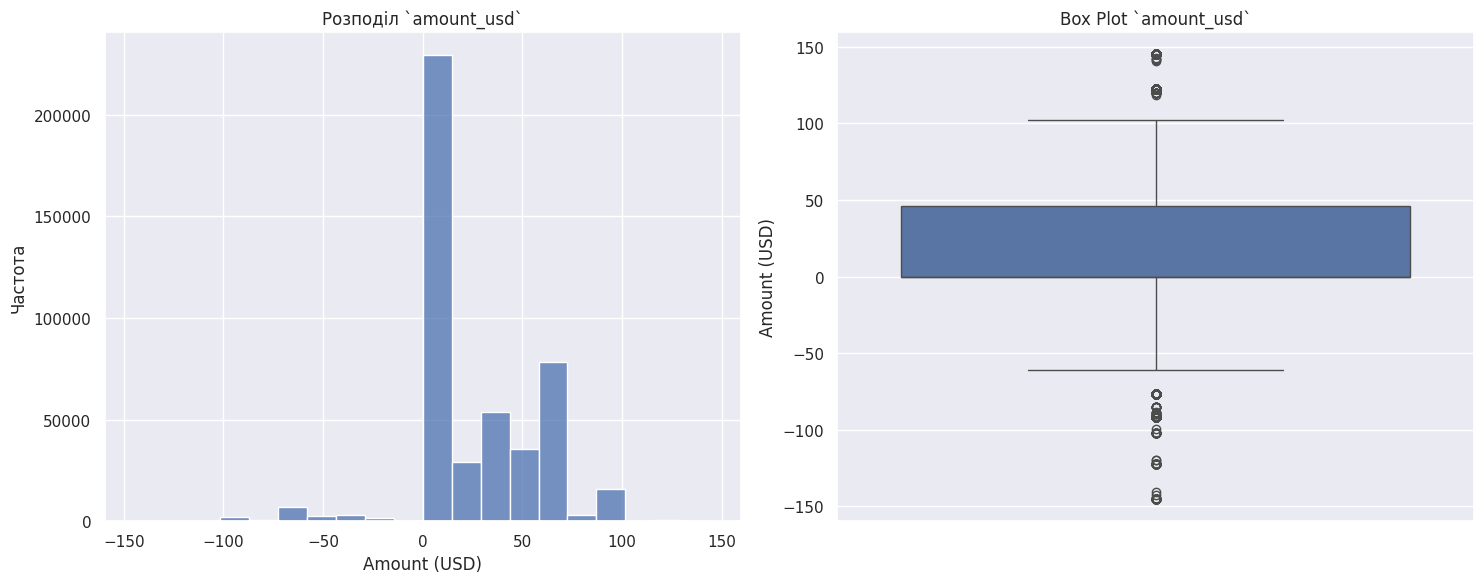

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['amount_usd'], kde=False, bins=20)
plt.title('Розподіл `amount_usd`')
plt.xlabel('Amount (USD)')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['amount_usd'])
plt.title('Box Plot `amount_usd`')
plt.ylabel('Amount (USD)')

plt.tight_layout()
plt.show()

### Розподіл `fee_usd`

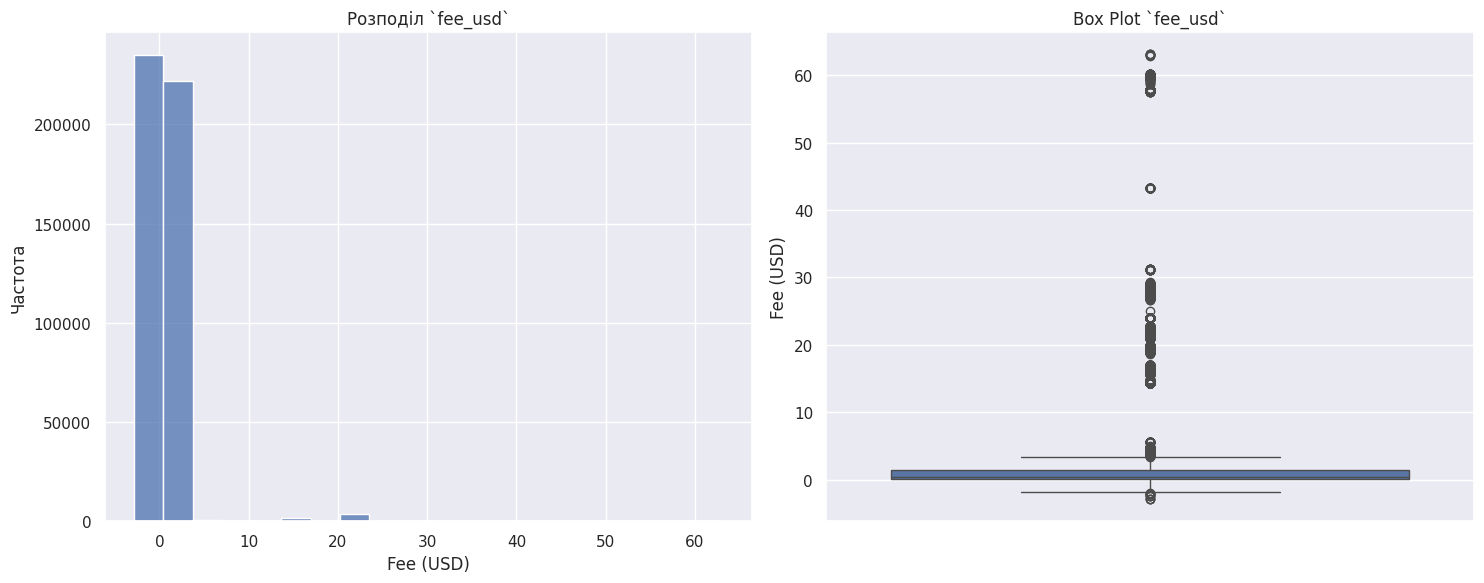

In [59]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['fee_usd'], kde=False, bins=20)
plt.title('Розподіл `fee_usd`')
plt.xlabel('Fee (USD)')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['fee_usd'])
plt.title('Box Plot `fee_usd`')
plt.ylabel('Fee (USD)')

plt.tight_layout()
plt.show()

### Розподіл `fee_usd` та `amount_usd` за днями тижня

In [16]:
print('Статистика `fee_usd` за днями тижня:')
display(df.groupby('transaction_dayofweek')['fee_usd'].sum())

print('\nСтатистика `amount_usd` за днями тижня:')
display(df.groupby('transaction_dayofweek')['amount_usd'].sum())

Статистика `fee_usd` за днями тижня:


,fee_usd
transaction_dayofweek,
0,70258.8644
1,69261.8345
2,70684.1668
3,69165.8603
4,69108.4937
5,70003.8086
6,67505.0519



Статистика `amount_usd` за днями тижня:


,amount_usd
transaction_dayofweek,
0,1366615.22
1,1346826.08
2,1348295.06
3,1341600.87
4,1365664.99
5,1346723.72
6,1356816.93


### Розподіл `fee_usd` та `amount_usd` за годинами доби (таблиця)

In [19]:
print('Статистика `fee_usd` за годинами доби:')
display(df.groupby('transaction_hour')['fee_usd'].sum())

print('\nСтатистика `amount_usd` за годинами доби:')
display(df.groupby('transaction_hour')['amount_usd'].sum())

Статистика `fee_usd` за годинами доби:


,fee_usd
transaction_hour,
0,20225.6438
1,21320.9623
2,19806.5879
3,20332.5104
4,20567.2391
5,20943.4345
6,20683.7450
7,19899.2579
8,20808.3811



Статистика `amount_usd` за годинами доби:


,amount_usd
transaction_hour,
0,395839.64
1,395036.49
2,398624.37
3,392119.73
4,403675.94
5,399571.48
6,403426.23
7,388326.11
8,396531.48
